## Data

In [1]:
from data import *

# dirs
imgs_dir = "Kvasir-SEG/images/*.jpg"
masks_dir = "Kvasir-SEG/masks/*.jpg"

dataloader_train, dataloader_test, dataloader_val = get_data(imgs_dir, masks_dir, resize=352, batch_size=12)

## Model

In [2]:
# check device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
from model import *
model = HarDMSEG().cuda()

In [4]:
from torchsummary import summary

In [ ]:
summary(model, (3, 352, 352))

## Train

In [ ]:
from train import train

In [ ]:
train_loss, train_precision, train_recall, train_dice, val_loss, val_precision, val_recall, val_dice = train(model, dataloader_train, dataloader_val, lr=1e-4, batchsize=12, epochs_num=300)

## Test HardNetMSEG

In [1]:
from test import *
from data import *

In [2]:
# dirs
imgs_dir = "Kvasir-SEG/images/*.jpg"
masks_dir = "Kvasir-SEG/masks/*.jpg"

dataloader_train, dataloader_test, dataloader_val = get_data(imgs_dir, masks_dir, resize=352, batch_size=12)

In [10]:
get_test_score(dataloader_test, "HardNetMSEG.pth", batchsize=1)

100it [00:07, 14.18it/s]

TEST: Loss: 0.389, Precision: 0.921, Recall: 0.87, mDice: 0.88


## Predict

In [1]:
from predict_viz import *
import glob

cuda:0


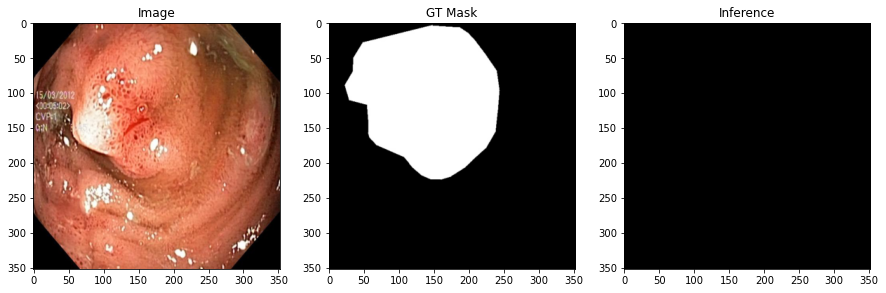

0.03894829750061035
Wall time: 1.25 s


In [3]:
%%time
img_num = 0


img_dir = "Kvasir-SEG/images/*.jpg"
mask_dir = "Kvasir-SEG/masks/*.jpg"
img_path = glob.glob(img_dir)[img_num]
mask_path = glob.glob(mask_dir)[img_num]

pred_time = pred_and_viz(img_path, mask_path, model_path='HardNetMSEG.pth', resize=352)
print(pred_time)